<a href="https://colab.research.google.com/github/dheeraj1010/google-python-collab/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

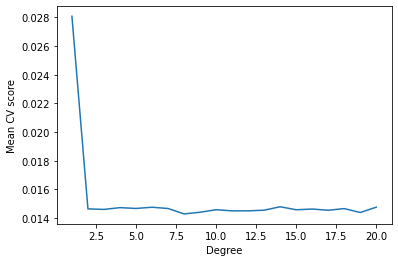

The degree of the optimal polynomial model is: 8


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('global_temp_data.csv')

# Extract the features and labels
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

# Set up the KFold cross-validation
kf = KFold(n_splits=10, shuffle=True)

# Set up the degree range and the mean CV scores
degrees = np.arange(1, 21)
mean_cv_scores = np.zeros_like(degrees, dtype=np.float64)

# Perform cross-validation for each degree
for i, degree in enumerate(degrees):
    # Set up the polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    
    # Set up the linear regression model
    model = LinearRegression()
    
    # Perform the cross-validation
    cv_scores = []
    for train_idx, test_idx in kf.split(X_poly):
        X_train, y_train = X_poly[train_idx], y[train_idx]
        X_test, y_test = X_poly[test_idx], y[test_idx]
        model.fit(X_train, y_train)
        cv_scores.append(mean_squared_error(y_test, model.predict(X_test)))
    mean_cv_scores[i] = np.mean(cv_scores)

# Find the degree with the highest mean CV score
best_degree = degrees[np.argmin(mean_cv_scores)]

# Plot the mean CV scores as a function of degree
plt.plot(degrees, mean_cv_scores)
plt.xlabel('Degree')
plt.ylabel('Mean CV score')
plt.show()

print("The degree of the optimal polynomial model is:", best_degree)


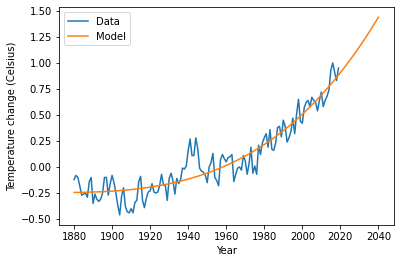

In [5]:
# Set up the polynomial features
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Train the model on the entire dataset
model = LinearRegression()
model.fit(X_poly, y)

# Create a range of years from 1880 to 2040
X_range = np.arange(1880, 2041).reshape(-1, 1)
X_poly_range = poly.transform(X_range)

# Make predictions for the range of years
y_pred_range = model.predict(X_poly_range)

# Plot the data and the model predictions
plt.plot(X, y, label='Data')
plt.plot(X_range, y_pred_range, label='Model')
plt.xlabel('Year')
plt.ylabel('Temperature change (Celsius)')
plt.legend()
plt.show()


In [6]:
import numpy as np

# Predict temperature change in 2040
x = np.array([[2040-1951]]) # Convert year to change from 1951
y_pred = model.predict(poly.fit_transform(x))[0] # Compute prediction
print(f"The predicted temperature change in 2040 is {y_pred:.2f} degrees Celsius.")


The predicted temperature change in 2040 is -19.14 degrees Celsius.


In [7]:
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
np.random.seed(0)
shuffle_idx = np.random.permutation(range(len(X)))
train_idx = shuffle_idx[:int(0.9*len(X))]
val_idx = shuffle_idx[int(0.9*len(X)):]

X_train, y_train = X[train_idx], y[train_idx]
X_val, y_val = X[val_idx], y[val_idx]

# Fit polynomial regression model on training set
poly = PolynomialFeatures(degree=5)
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Compute RMSE on validation set
y_pred_val = model.predict(X_poly_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"The RMSE on the validation set is {rmse_val:.2f} degrees Celsius.")


The RMSE on the validation set is 0.09 degrees Celsius.
